Mục đích: lấy X_train, X_test, y_train, y_test từ data/processed

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

PROC_DIR = Path("../data/processed")

X_train = pd.read_csv(PROC_DIR / "X_train.csv", index_col=0)
X_test  = pd.read_csv(PROC_DIR / "X_test.csv", index_col=0)
y_train = pd.read_csv(PROC_DIR / "y_train.csv", index_col=0)["status"]
y_test  = pd.read_csv(PROC_DIR / "y_test.csv", index_col=0)["status"]

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (172, 21) Test: (43, 21)


Mục đích: giả lập model đã được train xong

In [2]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

print("Model đã train trong session (chỉ dùng để test).")


Model đã train trong session (chỉ dùng để test).


Mục đích: tạo y_pred và y_score để test

In [3]:
y_pred = logreg.predict(X_test)
y_score = logreg.predict_proba(X_test)[:, 1]

pd.Series(y_pred).value_counts()


1    28
0    15
Name: count, dtype: int64

Mục đích: đo lường accuracy, precision, recall, f1, ROC AUC, PR AUC

In [4]:
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
roc  = roc_auc_score(y_test, y_score)
pra  = average_precision_score(y_test, y_score)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {roc:.3f}")
print(f"PR  AUC  : {pra:.3f}")


Accuracy : 0.860
Precision: 0.929
Recall   : 0.867
F1-score : 0.897
ROC AUC  : 0.938
PR  AUC  : 0.976


Mục đích: trực quan số dự đoán đúng/sai

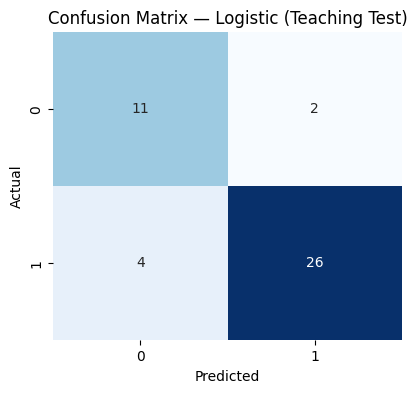

In [5]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4.5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic (Teaching Test)")
plt.show()


Mục đích: trực quan khả năng phân biệt ở nhiều ngưỡng

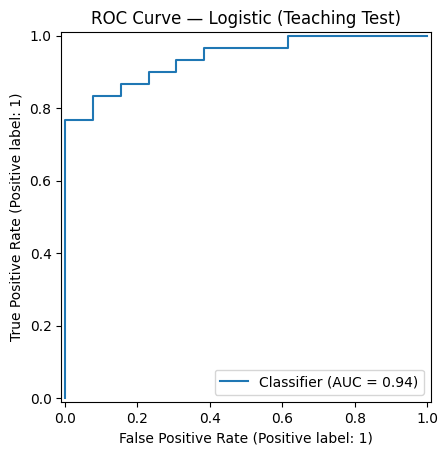

In [6]:
RocCurveDisplay.from_predictions(y_test, y_score)
plt.title("ROC Curve — Logistic (Teaching Test)")
plt.show()


Mục đích: hữu ích khi dữ liệu mất cân bằng

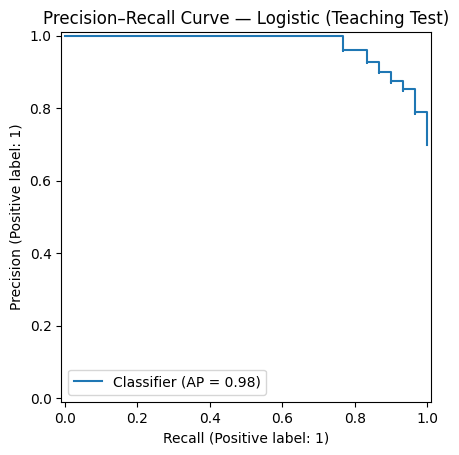

In [7]:
PrecisionRecallDisplay.from_predictions(y_test, y_score)
plt.title("Precision–Recall Curve — Logistic (Teaching Test)")
plt.show()
